# Case Study on Supervised learning.

Following operations are done on iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris
   species.(also do random forest algorithm

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Read the dataset to the python environment.

In [2]:
df=pd.read_excel(r'C:\Users\ASUS\Downloads\Iriss.xls')
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


2. Do necessary pre-processing steps.

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
#Label encoding is done on classification cloumn
le = LabelEncoder()
label=le.fit_transform(df['Classification'])

In [6]:
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
data=df.drop('Classification',axis=1)
data

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,NaN,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,NaN,2.0
148,6.2,3.4,5.4,2.3


In [8]:
data['Classification']=label
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,NaN,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,NaN,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
data.isna().sum()#checking for null values.

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [45]:
data['SL'].fillna(df['SL'].mode()[0],inplace=True) #filling null values.
data['SW'].fillna(df['SW'].mode()[0],inplace=True)
data['PL'].fillna(df['PL'].mode()[0],inplace=True)

In [46]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.0,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,1.5,2.0,2
148,6.2,3.4,5.4,2.3,2


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [47]:
data.isna().sum()#zero null vales.

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [ ]:
#Checking for outliers.

Text(0.5, 1.0, 'Box plot of SL')

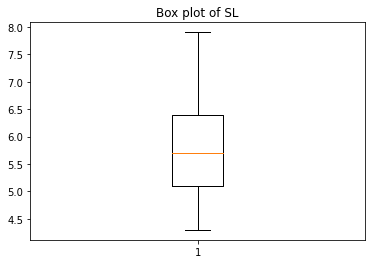

In [71]:
plt.boxplot(data['SL'])
plt.title('Box plot of SL')

Text(0.5, 1.0, 'Box plot of SW')

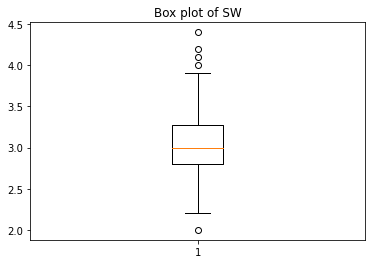

In [70]:
plt.boxplot(data['SW'])
plt.title('Box plot of SW')

Text(0.5, 1.0, 'Box plot of PL')

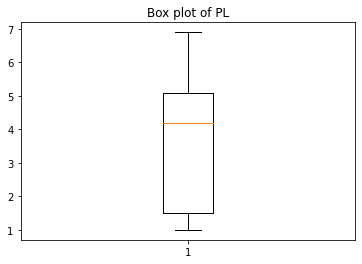

In [68]:
plt.boxplot(data['PL'])
plt.title('Box plot of PL')

Text(0.5, 1.0, 'Box plot of PW')

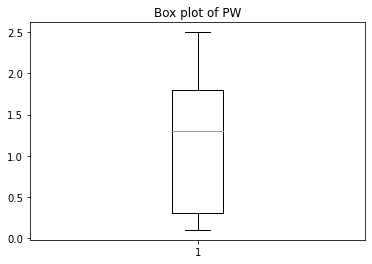

In [69]:
plt.boxplot(data['PW'])
plt.title('Box plot of PW')

3. Find out which classification model gives the best result to predict iris
   species.(also do random forest algorithm)

In [48]:
x=data.drop(['Classification'],axis=1)
y=pd.DataFrame(data['Classification'])

In [49]:
from sklearn.model_selection import train_test_split


In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)#splitting data

In [51]:
#building Random forest model.
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train.values.ravel())
y_pred=rf.predict(x_test)

In [83]:
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score

In [67]:
f1_score(y_test,y_pred,average='micro')

0.9666666666666667

Here the F1 score is .96

In [55]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0,  7,  1],
       [ 0,  0,  8]], dtype=int64)

In [68]:
#Logistic Regression model.

In [79]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(x_train,y_train.values.ravel())
y_pred(lr.predict(x_test))

TypeError: 'numpy.ndarray' object is not callable

In [80]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [81]:
f1_score(y_test,y_pred,average='micro')

0.9333333333333333

In [84]:
accuracy_score(y_test,y_pred)

0.9333333333333333

F1 score is high for Random forest model. so, Random forest model is best model.